<a href="https://colab.research.google.com/github/crisfreak036/MD-Proyecto-2020-2/blob/main/Trabajo_Final_Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Semestral Grupo 1

**Integrantes:**
- Camila Carrasco Latin
- Cristopher Soto Gutiérrez
- Ramiro Uribe Garrido

**Profesor:**
- Claudio Collao Bahamondes

**Fecha:** 28-12-2020

In [265]:
# Importación de las librerías iniciales
import pandas as pd
import numpy as np
from google.colab import drive #Para trabajar con Google Drive
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#Colab
drive.mount('/content/drive/')
ruta = '/content/drive/My Drive/Colab Notebooks/Proyecto-G1' #Ruta de montaje 

In [267]:
# Carga de información
data = pd.read_csv('%s/data.csv'%ruta)

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

In [269]:
data.drop('Unnamed: 0',axis=1,inplace=True) #Se elimina la columna Unnamed: 0

## Pandas Profile

In [ ]:
!pip install pandas-profiling==2.7.1 

In [271]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/49 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Rellenado Columnas Drogas

Las columnas que hacen alusión a las drogas que se encontrarón en el cadáver de la persona tienen una gran cantidad de datos nulos debido a que sólo se marcaba con una 'Y' cuando existia la presencia de la droga, de lo contrario se dejaba sin nada. Debido a lo anterior, se procede a rellenar los nulos con una 'N' que hace referencia a que no se encontraba la dorga en el cadáver.

In [272]:
data.columns

Index(['ID', 'Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'ResidenceCounty',
       'ResidenceState', 'DeathCity', 'DeathCounty', 'Location',
       'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity',
       'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Heroin',
       'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'MannerofDeath'],
      dtype='object')

In [273]:
drogas = ['Heroin',
 'Cocaine',
 'Fentanyl',
 'FentanylAnalogue',
 'Oxycodone',
 'Oxymorphone',
 'Ethanol',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Amphet',
 'Tramad',
 'Morphine_NotHeroin',
 'Hydromorphone',
 'OpiateNOS',
 'AnyOpioid']

In [274]:
#Creación de un df sólo con las columnas de Drogas
drugs = data[['Heroin',
 'Cocaine',
 'Fentanyl',
 'FentanylAnalogue',
 'Oxycodone',
 'Oxymorphone',
 'Ethanol',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Amphet',
 'Tramad',
 'Morphine_NotHeroin',
 'Hydromorphone',
 'OpiateNOS',
 'AnyOpioid']]

In [275]:
drugs.isnull().sum()

Heroin                2576
Cocaine               3584
Fentanyl              2873
FentanylAnalogue      4716
Oxycodone             4498
Oxymorphone           4997
Ethanol               3858
Hydrocodone           4987
Benzodiazepine        3762
Methadone             4631
Amphet                4946
Tramad                4975
Morphine_NotHeroin    5063
Hydromorphone         5080
OpiateNOS             5017
AnyOpioid             2639
dtype: int64

In [276]:
drugs.fillna('N',inplace=True) #Se llenan los vacios con la letra N

In [277]:
drugs.isnull().sum() #Se comprueba que ya no existan 

Heroin                0
Cocaine               0
Fentanyl              0
FentanylAnalogue      0
Oxycodone             0
Oxymorphone           0
Ethanol               0
Hydrocodone           0
Benzodiazepine        0
Methadone             0
Amphet                0
Tramad                0
Morphine_NotHeroin    0
Hydromorphone         0
OpiateNOS             0
AnyOpioid             0
dtype: int64

In [278]:
drugs.Fentanyl.value_counts()

N           2873
Y           2228
Y-A            2
Y (PTCH)       1
Y POPS         1
Name: Fentanyl, dtype: int64

In [279]:
drugs.Morphine_NotHeroin.value_counts()

N                   5063
Y                     38
PCP NEG                1
STOLE MEDS             1
NO RX BUT STRAWS       1
YES                    1
Name: Morphine_NotHeroin, dtype: int64

In [280]:
#Se estandarizan los valores de Y en ambas columnas
for i in range(0,len(drugs)):
  if drugs.Fentanyl[i] != 'Y' and drugs.Fentanyl[i] != 'N':
    drugs.Fentanyl[i] = 'Y'
  if drugs.Morphine_NotHeroin[i] != 'Y' and drugs.Morphine_NotHeroin[i] != 'N':
    drugs.Morphine_NotHeroin[i] = 'Y'

In [281]:
drugs.Fentanyl.value_counts()

N    2873
Y    2232
Name: Fentanyl, dtype: int64

In [282]:
drugs.Morphine_NotHeroin.value_counts()

N    5063
Y      42
Name: Morphine_NotHeroin, dtype: int64

In [283]:
#Las antiguas columnas de drogas se cambian por las columnas ya trabajadas
for drog in drogas:
    data[drog] = drugs[drog]

In [284]:
data.isnull().sum()

ID                        0
Date                      2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
FentanylAnalogue          0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other                  4670
OpiateNOS                 0
AnyOpioid           

## Limpieza

In [285]:
data.shape

(5105, 37)

In [286]:
porcentaje_nulos = (data.isna().mean())*100
porcentaje_nulos

ID                      0.000000
Date                    0.039177
Age                     0.058766
Sex                     0.117532
Race                    0.254652
ResidenceCity           3.388834
ResidenceCounty        15.612145
ResidenceState         30.342801
DeathCity               0.097943
DeathCounty            21.547502
Location                0.470127
LocationifOther        88.442703
DescriptionofInjury    15.279138
InjuryPlace             1.292850
InjuryCity             34.397649
InjuryCounty           53.692458
InjuryState            72.105779
COD                     0.000000
OtherSignifican        96.689520
Heroin                  0.000000
Cocaine                 0.000000
Fentanyl                0.000000
FentanylAnalogue        0.000000
Oxycodone               0.000000
Oxymorphone             0.000000
Ethanol                 0.000000
Hydrocodone             0.000000
Benzodiazepine          0.000000
Methadone               0.000000
Amphet                  0.000000
Tramad    

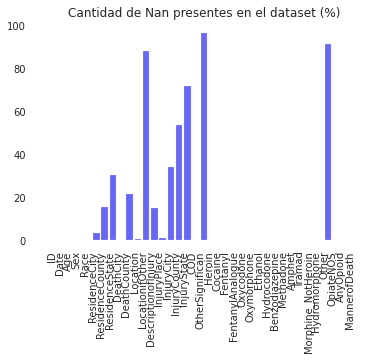

In [287]:
# Gráfico de barras que muestra en % la cantidad de valores Nan de cada columna
import matplotlib.pyplot as plt
plt.title("Cantidad de Nan presentes en el dataset (%)")
plt.xticks(rotation = 90)
plt.bar(data.columns, porcentaje_nulos, color = "blue", align= 'edge', alpha = 0.6, width=0.8)
plt.show()

### Columnas con alto porcentaje de valores Nan

In [288]:
porcentaje_nulos[porcentaje_nulos > 10]

ResidenceCounty        15.612145
ResidenceState         30.342801
DeathCounty            21.547502
LocationifOther        88.442703
DescriptionofInjury    15.279138
InjuryCity             34.397649
InjuryCounty           53.692458
InjuryState            72.105779
OtherSignifican        96.689520
Other                  91.478942
dtype: float64

ResidenceCounty, ResidenceState, DeathCounty, LocationifOther, DescriptionofInjury, InjuryCity, InjuryCounty, InjuryState, OtherSignifican, Other presentan una gran cantidad de valores Nan por lo cual se toma la decisión de no utilizarlas.

In [289]:
data.columns

Index(['ID', 'Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'ResidenceCounty',
       'ResidenceState', 'DeathCity', 'DeathCounty', 'Location',
       'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity',
       'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Heroin',
       'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'MannerofDeath'],
      dtype='object')

In [290]:
#Se crea data_2 el cual contendrá todas las columnas que no hayan sido descartadas hasta ahora
data_2 = data[['ID', 'Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'DeathCity', 'Location',
               'COD', 'Heroin','Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
               'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
               'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS',
               'AnyOpioid', 'MannerofDeath']]

In [291]:
data_2.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,COD,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,14-0273,06/28/2014 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",N,N,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Accident
1,13-0102,03/21/2013 12:00:00 AM,48.0,Male,Black,NORWALK,NORWALK,Hospital,Cocaine Intoxication,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
2,16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,Acute Heroin and Cocaine Intoxication,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
3,16-0208,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,GREENWICH,Hospital,Acute Fentanyl and Morphine Intoxication,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
4,13-0052,02/13/2013 12:00:00 AM,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,Fentanyl Intoxication,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident


### Analisis de data_2

In [292]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5105 non-null   object 
 1   Date                5103 non-null   object 
 2   Age                 5102 non-null   float64
 3   Sex                 5099 non-null   object 
 4   Race                5092 non-null   object 
 5   ResidenceCity       4932 non-null   object 
 6   DeathCity           5100 non-null   object 
 7   Location            5081 non-null   object 
 8   COD                 5105 non-null   object 
 9   Heroin              5105 non-null   object 
 10  Cocaine             5105 non-null   object 
 11  Fentanyl            5105 non-null   object 
 12  FentanylAnalogue    5105 non-null   object 
 13  Oxycodone           5105 non-null   object 
 14  Oxymorphone         5105 non-null   object 
 15  Ethanol             5105 non-null   object 
 16  Hydroc

#### Tratamiento de los valores Nan de data_2

In [293]:
data_2.isnull().sum()

ID                      0
Date                    2
Age                     3
Sex                     6
Race                   13
ResidenceCity         173
DeathCity               5
Location               24
COD                     0
Heroin                  0
Cocaine                 0
Fentanyl                0
FentanylAnalogue        0
Oxycodone               0
Oxymorphone             0
Ethanol                 0
Hydrocodone             0
Benzodiazepine          0
Methadone               0
Amphet                  0
Tramad                  0
Morphine_NotHeroin      0
Hydromorphone           0
OpiateNOS               0
AnyOpioid               0
MannerofDeath          10
dtype: int64

In [294]:
data_2.shape

(5105, 26)

La cantidad de datos Nan presentes en data_2 es de 236 lo que corresponde aproximadamente al 4.62% de los datos totales de data_2 lo cual no es un porcentaje que al ser eliminado deje inservible a data_2. Sabiendo lo anterior se decidé eliminar los Nan presentes en data_2.

In [295]:
data_2 = data_2.dropna() #Se eliminan las filas con valore nulos
data_2.reset_index(drop=True, inplace=True) #Resetea los indices
data_2.shape

(4896, 26)

In [296]:
data_2.isnull().sum()

ID                    0
Date                  0
Age                   0
Sex                   0
Race                  0
ResidenceCity         0
DeathCity             0
Location              0
COD                   0
Heroin                0
Cocaine               0
Fentanyl              0
FentanylAnalogue      0
Oxycodone             0
Oxymorphone           0
Ethanol               0
Hydrocodone           0
Benzodiazepine        0
Methadone             0
Amphet                0
Tramad                0
Morphine_NotHeroin    0
Hydromorphone         0
OpiateNOS             0
AnyOpioid             0
MannerofDeath         0
dtype: int64

#### Analisis de las columnas



##### ID

In [297]:
data_2.ID.value_counts()

17-0190    1
14-0505    1
14-0029    1
15-0642    1
18-0345    1
          ..
16-0116    1
18-0263    1
16-0110    1
12-0065    1
17-0448    1
Name: ID, Length: 4896, dtype: int64

El ID como tal es poco relevante para lo que se quiere hacer, por lo cual se procede a eliminar.

In [298]:
data_2.drop('ID',axis=1,inplace=True) #Se elimina la columna ID
data_2.head()

,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,COD,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,03/21/2013 12:00:00 AM,48.0,Male,Black,NORWALK,NORWALK,Hospital,Cocaine Intoxication,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
1,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,Acute Heroin and Cocaine Intoxication,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
2,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,GREENWICH,Hospital,Acute Fentanyl and Morphine Intoxication,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
3,02/13/2013 12:00:00 AM,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,Fentanyl Intoxication,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
4,06/29/2014 12:00:00 AM,23.0,Male,White,BRISTOL,BRISTOL,Residence,Heroin Intoxication,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident


##### Date

In [299]:
data_2.Date.value_counts()

08/18/2017 12:00:00 AM    9
06/18/2017 12:00:00 AM    9
12/17/2018 12:00:00 AM    8
09/21/2013 12:00:00 AM    8
03/05/2017 12:00:00 AM    8
                         ..
12/03/2012 12:00:00 AM    1
09/30/2013 12:00:00 AM    1
02/03/2012 12:00:00 AM    1
01/05/2013 12:00:00 AM    1
09/11/2015 12:00:00 AM    1
Name: Date, Length: 2071, dtype: int64

La columna Date que contiene la fecha de muerte de la personas y una hora que en cada caso se mantiene como 12:00:00 AM no será utilizada por lo cual se procede a eliminar

In [300]:
data_2.drop('Date',axis=1,inplace=True) #Se elimina la columna Date
data_2.head()

,Age,Sex,Race,ResidenceCity,DeathCity,Location,COD,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,48.0,Male,Black,NORWALK,NORWALK,Hospital,Cocaine Intoxication,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
1,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,Acute Heroin and Cocaine Intoxication,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
2,23.0,Male,White,RYE,GREENWICH,Hospital,Acute Fentanyl and Morphine Intoxication,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
3,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,Fentanyl Intoxication,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
4,23.0,Male,White,BRISTOL,BRISTOL,Residence,Heroin Intoxication,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident


##### Age
Aquí se buscaran los outliers pertenecientes a la columna Age.

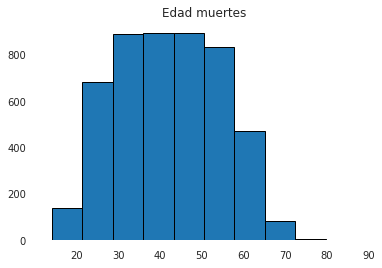

In [301]:
%matplotlib inline
plt.title('Edad muertes')
plt.hist(data_2["Age"], edgecolor = 'black', linewidth=1)
plt.show()

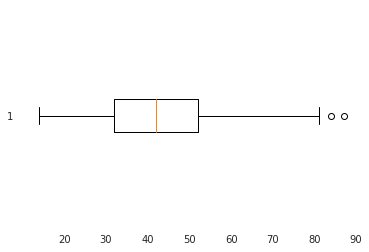

In [302]:
plt.boxplot(data_2['Age'],vert=False)
plt.show()

In [303]:
Q1= data_2["Age"].quantile(0.25)
print ("primer cuartil", Q1)
Q3= data_2["Age"].quantile(0.75)
print ("tercer cuartil", Q3)
IQR=Q3-Q1
print ("Rango intercuartil", IQR)
Mediana = data_2["Age"].median()
print ("Mediana", Mediana)
Valor_minimo = data_2["Age"].min()
print ("Valor_minimo",Valor_minimo )
Valor_maximo = data_2["Age"].max()
print ("Valor_maximo", Valor_maximo)

primer cuartil 32.0
tercer cuartil 52.0
Rango intercuartil 20.0
Mediana 42.0
Valor_minimo 14.0
Valor_maximo 87.0


In [304]:
BI_Calculado = (Q1-1.5*IQR)
print ("BI_Calculado ",BI_Calculado )
BS_Calculado = (Q3+1.5*IQR)
print ("BS_Calculado ",BS_Calculado )

BI_Calculado  2.0
BS_Calculado  82.0


In [305]:
Ubicacion_outliers = (data_2["Age"]<BI_Calculado) | (data_2["Age"]>BS_Calculado)
outliers= data_2[Ubicacion_outliers]
Outliers_ordenados = outliers.sort_values("Age")
Outliers_ordenados

,Age,Sex,Race,ResidenceCity,DeathCity,Location,COD,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
1891,84.0,Male,"Hispanic, White",BRIDGEPORT,BRIDGEPORT,Hospital,Acute IntoxicationCombined Effects of Fentanyl...,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
2420,87.0,Male,"Hispanic, White",NEW HAVEN,NEW HAVEN,Residence,Acute Oxycodone Toxicity,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Accident


Las filas que contienen los outliers detectados serán eliminadas

In [306]:
data_2.drop(data_2[data_2["Age"]<BI_Calculado].index,inplace=True)
data_2.drop(data_2[data_2["Age"]>BS_Calculado].index,inplace=True)
data_2.reset_index(drop=True, inplace=True)
data_2.shape

(4894, 24)

In [307]:
print("Límite Inferior: ",BI_Calculado )
print('La edad mínima es: ',data_2.Age.min())
print("Límite Superior: ",BS_Calculado )
print('La edad máxima es: ',data_2.Age.max())

Límite Inferior:  2.0
La edad mínima es:  14.0
Límite Superior:  82.0
La edad máxima es:  81.0


In [308]:
data_edad = data_2.Age
data_edad.head()

0    48.0
1    30.0
2    23.0
3    22.0
4    23.0
Name: Age, dtype: float64

##### Sex

In [309]:
data_2.Sex.value_counts()

Male       3621
Female     1272
Unknown       1
Name: Sex, dtype: int64

En el caso de la columna Sex que contienen los sexos de las personas muertas, existe sólo un Unknown el cual será reemplazado por la moda que en este caso es Male.

In [310]:
data_2.Sex.replace('Unknown','Male', inplace=True)
data_2.Sex.value_counts()

Male      3622
Female    1272
Name: Sex, dtype: int64

In [311]:
'''
Se crea un df auxiliar que guardará los valores númericos de los valores cateogricos de Sex
A las Female (Mujeres) se les asigna el valor 1 y a los Male (Hombres) el 2
'''
data_sexo =  data_2['Sex'].apply(lambda x: 1 if x=='Female' else 2)
data_sexo

0       2
1       1
2       2
3       2
4       2
       ..
4889    2
4890    2
4891    2
4892    2
4893    2
Name: Sex, Length: 4894, dtype: int64

##### Race

In [312]:
val_con_raza = data_2.Race.value_counts()
val_con_raza

White                     3875
Hispanic, White            521
Black                      410
Hispanic, Black             21
Unknown                     21
Asian, Other                18
Asian Indian                14
Other                       10
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

In [313]:
#Función que calcula el porcentaje de presencia del dato en la columna
def Porcentajes(Serie):
  porcentaje = 0
  total = Serie.sum()
  for i in range(0,len(Serie)):
    porcentaje = (Serie[i]/total)*100
    print(porcentaje)

In [314]:
Porcentajes(val_con_raza) #Se muestran los porcentajes en el orden que los arroja value_counts()

79.1785860237025
10.645688598283613
8.377605230894973
0.4290968532897425
0.4290968532897425
0.36779730281977935
0.28606456885982834
0.2043318348998774
0.04086636697997548
0.02043318348998774
0.02043318348998774


Como se puede observar, White, Hispanic White y Black son los valores con mayor presencia dentro de la columna Race por lo cual cuando se genere la versión numércia de data_2 se considerarán sólo esos 3.

In [315]:
data_raza = data_2.Race.copy(deep=True)
for i in range(0,len(data_raza)):
  if data_raza[i] == 'White':
    data_raza[i] = 1
  elif data_raza[i] == 'Hispanic, White':
    data_raza[i] = 2
  elif data_raza[i] == 'Black':
    data_raza[i] = 3
  elif data_raza[i] == 'Hispanic, Black':
    data_raza[i] = 4
  elif data_raza[i] == 'Asian, Other':
    data_raza[i] = 5
  elif data_raza[i] == 'Asian Indian':
    data_raza[i] = 6
  elif data_raza[i] == 'Chinese':
    data_raza[i] = 7
  elif data_raza[i] == 'Hawaiian':
    data_raza[i] = 8
  elif data_raza[i] == 'Native American, Other':
    data_raza[i] = 9
  elif data_raza[i] == 'Other':
    data_raza[i] = 10
  else:
    data_raza[i] = 11
data_raza

0       3
1       1
2       1
3       5
4       1
       ..
4889    1
4890    1
4891    1
4892    1
4893    1
Name: Race, Length: 4894, dtype: object

In [316]:
#Se cambia el dtype de data_raza a int64
numeric_race = pd.to_numeric(data_raza)
data_raza = numeric_race
data_raza

0       3
1       1
2       1
3       5
4       1
       ..
4889    1
4890    1
4891    1
4892    1
4893    1
Name: Race, Length: 4894, dtype: int64

In [317]:
data_2.Race

0              Black
1              White
2              White
3       Asian, Other
4              White
            ...     
4889           White
4890           White
4891           White
4892           White
4893           White
Name: Race, Length: 4894, dtype: object

##### Columnas City

###### ResidenceCity

In [318]:
val_con_RC = data_2.ResidenceCity.value_counts()
val_con_RC

HARTFORD         290
WATERBURY        268
BRIDGEPORT       236
NEW HAVEN        223
NEW BRITAIN      190
                ... 
NEW PRESTON        1
SEBRING            1
CHELSEA            1
NEW BEDFORD        1
JAMAICA PLAIN      1
Name: ResidenceCity, Length: 369, dtype: int64

In [319]:
Porcentajes(val_con_RC)

5.925623212096444
5.476093175316715
4.822231303637107
4.556599918267266
3.8823048630976706
2.7176134041683695
2.5541479362484676
2.206783816918676
2.0841847159787497
2.0024519820187985
1.8594196975888841
1.8185533306089088
1.7981201471189212
1.7572537801389458
1.6959542296689822
1.6346546791990193
1.593788312219044
1.3485901103391909
1.26685737637924
1.246424192889252
1.1442582754393134
1.103391908459338
1.0829587249693502
1.021659174499387
1.021659174499387
1.0012259910093992
0.8990600735594606
0.8990600735594606
0.8786268900694729
0.858193706579485
0.8173273395995097
0.8173273395995097
0.796894156109522
0.796894156109522
0.7355946056395587
0.6538618716796076
0.5925623212096445
0.5721291377196567
0.551695954229669
0.5312627707396812
0.5312627707396812
0.5108295872496935
0.5108295872496935
0.4903964037597058
0.469963220269718
0.469963220269718
0.469963220269718
0.469963220269718
0.4495300367797303
0.4495300367797303
0.4086636697997548
0.36779730281977935
0.36779730281977935
0.367797302

###### DeathCity

In [320]:
val_con_DC = data_2.DeathCity.value_counts()
val_con_DC

HARTFORD            526
WATERBURY           353
NEW HAVEN           350
BRIDGEPORT          318
NEW BRITAIN         218
                   ... 
BOLTON                1
ROGERS                1
NORTH WINDHAM         1
VERNON-ROCKVILLE      1
QUINEBAUG             1
Name: DeathCity, Length: 221, dtype: int64

In [321]:
Porcentajes(val_con_DC)

10.747854515733552
7.212913771965672
7.151614221495708
6.497752349816101
4.4544340008173275
2.8606456885982836
2.8606456885982836
2.840212505108296
2.6358806702084183
2.4519820187985286
2.2476501838986516
2.0228851655087863
1.9820187985288107
1.6142214957090315
1.4711892112791174
1.409889660809154
1.3690232938291786
1.3485901103391909
1.3485901103391909
1.3077237433592153
1.0829587249693502
1.0829587249693502
0.9603596240294239
0.9603596240294239
0.939926440539436
0.8990600735594606
0.8377605230894973
0.8377605230894973
0.7355946056395587
0.7151614221495709
0.6129955046996322
0.5721291377196567
0.5721291377196567
0.551695954229669
0.551695954229669
0.4903964037597058
0.4903964037597058
0.469963220269718
0.469963220269718
0.4495300367797303
0.4290968532897425
0.4290968532897425
0.4086636697997548
0.3882304863097671
0.3882304863097671
0.36779730281977935
0.36779730281977935
0.3269309358398038
0.3269309358398038
0.3269309358398038
0.3269309358398038
0.3064977523498161
0.3064977523498161
0

###### Conclusión
En base a lo observado, ambas columnas City tienen valores que dentro de cada columna con apenas alcanzan el 10% de presencia por lo cual lleva a que no serán consideradas, además hay que sumar el hecho de que estas columnas estaban relacionadas con las columnas ResidenceState, ResidenceCounty y DeathCounty las cuales ya fueron eliminadas con anterioridad. Todo lo anterior lleva a la decisión de eliminar ambas columnas City.

In [322]:
data_2.drop('ResidenceCity',axis=1,inplace=True) #Se elimina la columna MannerofDeath
data_2.drop('DeathCity',axis=1,inplace=True) #Se elimina la columna MannerofDeath
data_2.head()

,Age,Sex,Race,Location,COD,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,48.0,Male,Black,Hospital,Cocaine Intoxication,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
1,30.0,Female,White,Hospital,Acute Heroin and Cocaine Intoxication,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
2,23.0,Male,White,Hospital,Acute Fentanyl and Morphine Intoxication,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
3,22.0,Male,"Asian, Other",Hospital,Fentanyl Intoxication,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
4,23.0,Male,White,Residence,Heroin Intoxication,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident


##### Location

In [323]:
val_con_Location = data_2.Location.value_counts()
val_con_Location

Residence            2663
Hospital             1572
Other                 655
Convalescent Home       2
Nursing Home            1
Hospice                 1
Name: Location, dtype: int64

In [324]:
Porcentajes(val_con_Location)

54.41356763383736
32.12096444626072
13.383735185941969
0.04086636697997548
0.02043318348998774
0.02043318348998774


Como se puede observar, Residence, Hospital y Other son los valores con mayor presencia dentro de la columna Location. De los 3 valores, Other no será considerado ya que su significado lo daba LocationifOther la cual ya fue descartada con anterioridad y aunque se reemplazarán los Other por los valores correspondientes en la columna LocationifOther, la presencia de estos sería baja lo que llevaría a que no sean considerados. Por lo cual cuando se genere la versión numércia de data_2 se considerarán sólo los valores numéricos de Residence y Hospital.

In [325]:
data_location = data_2.Location.copy(deep=True)
for i in range(0,len(data_location)):
  if data_location[i] == 'Residence':
    data_location[i] = 1
  elif data_location[i] == 'Hospital':
    data_location[i] = 2
  elif data_location[i] == 'Convalescent Home':
    data_location[i] = 3
  elif data_location[i] == 'Hospice':
    data_location[i] = 4
  elif data_location[i] == 'Nursing Home':
    data_location[i] = 5
  else:
    data_location[i] = 6
data_location


0       2
1       2
2       2
3       2
4       1
       ..
4889    1
4890    2
4891    6
4892    6
4893    6
Name: Location, Length: 4894, dtype: object

In [326]:
#Se cambia el dtype de data_location a int64
numeric_location = pd.to_numeric(data_location)
data_location = numeric_location
data_location

0       2
1       2
2       2
3       2
4       1
       ..
4889    1
4890    2
4891    6
4892    6
4893    6
Name: Location, Length: 4894, dtype: int64

In [327]:
data_2.Location

0        Hospital
1        Hospital
2        Hospital
3        Hospital
4       Residence
          ...    
4889    Residence
4890     Hospital
4891        Other
4892        Other
4893        Other
Name: Location, Length: 4894, dtype: object

##### COD 

In [328]:
data_2.COD.value_counts()

Acute Fentanyl Intoxication                                                                                                     164
Multiple Drug Toxicity                                                                                                          128
Heroin Intoxication                                                                                                             123
Acute Heroin Intoxication                                                                                                       115
Heroin Toxicity                                                                                                                  93
                                                                                                                               ... 
Combined Effects of Morphine, Diazapem, Oxazepam, Temazepam, Bupropion, Clomipramine and Duloxetime                               1
Acute Intoxication From the Combined Effects of Heroin, Tramadol, and alcoho

COD es una columna no estandarizada lo cual provoca que contenga 3082 valores únicos. Este tipo de columnas requiere un trabajo más allá del proyecto por lo cual se eliminará, de todas fromas si esto fuera trabajo real, eliminarla no sería la primera opción.

In [329]:
data_2.drop('COD',axis=1,inplace=True) #Se elimina la columna COD
data_2.head()

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,48.0,Male,Black,Hospital,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
1,30.0,Female,White,Hospital,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
2,23.0,Male,White,Hospital,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Accident
3,22.0,Male,"Asian, Other",Hospital,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident
4,23.0,Male,White,Residence,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Accident


##### MannerofDeath

In [330]:
data_2.MannerofDeath.value_counts()

Accident    4866
Pending       14
accident      12
Natural        1
ACCIDENT       1
Name: MannerofDeath, dtype: int64

In [331]:
data_2.MannerofDeath.replace('accident','Accident',inplace=True)
data_2.MannerofDeath.replace('ACCIDENT','Accident',inplace=True)
data_2.MannerofDeath.value_counts()

Accident    4879
Pending       14
Natural        1
Name: MannerofDeath, dtype: int64

MannerofDeath contiene la Manera de muerte de la persona, la mayoría fueron Accidentales, existen Pendientes los cuales han de hacer alusión a que se iban a definir después la manera en que murió y existe un natural el cual por las caracteristicas del Dataset debería ser Accidental. Todo lo anterior lleva a la conclusión de que esta columna debería esta llena practicamente sólo con Accident por lo cual su relevancia en el proyeto es casi nula así que se procede a eliminar.

In [332]:
data_2.drop('MannerofDeath',axis=1,inplace=True) #Se elimina la columna MannerofDeath
data_2.head()

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,48.0,Male,Black,Hospital,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,30.0,Female,White,Hospital,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y
2,23.0,Male,White,Hospital,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y
3,22.0,Male,"Asian, Other",Hospital,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N
4,23.0,Male,White,Residence,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


## Creación del Dataset numérico

In [333]:
data_2.columns

Index(['Age', 'Sex', 'Race', 'Location', 'Heroin', 'Cocaine', 'Fentanyl',
       'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid'],
      dtype='object')

In [334]:
columnas = ['Age', 'Sex', 'Race', 'Location', 'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS',
       'AnyOpioid',]

In [335]:
list(columnas)

['Age',
 'Sex',
 'Race',
 'Location',
 'Heroin',
 'Cocaine',
 'Fentanyl',
 'FentanylAnalogue',
 'Oxycodone',
 'Oxymorphone',
 'Ethanol',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Amphet',
 'Tramad',
 'Morphine_NotHeroin',
 'Hydromorphone',
 'OpiateNOS',
 'AnyOpioid']

In [336]:
#df auxiliar con la información de las drogas correspondientes a los nuevos indices 
data_drogas = data_2[['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS',
       'AnyOpioid']]
data_drogas.shape

(4894, 16)

In [337]:
'''
Definición de la función que transforma a númerico las drogas
Recibe un dataset y el nombre de la columna (droga)
'''
def Drug_numbers(data, drug):
  data[drug] = data[drug].apply(lambda x: 1 if x=='Y' else 0)

In [338]:
'''
Iteración de la lista columns que contiene el nombre de todas columnas con
nombre de drogas que tiene data_work. Lo anterior se hace para tranformar a
numero los valores de las columnas con la función Drug_numbers
'''
for drog in drogas:
  Drug_numbers(data_drogas,drog)
data_drogas.head()

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [339]:
data_2

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,48.0,Male,Black,Hospital,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,30.0,Female,White,Hospital,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y
2,23.0,Male,White,Hospital,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y
3,22.0,Male,"Asian, Other",Hospital,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N
4,23.0,Male,White,Residence,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,43.0,Male,White,Residence,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N
4890,21.0,Male,White,Hospital,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N
4891,30.0,Male,White,Other,Y,N,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,Y
4892,33.0,Male,White,Other,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N


In [340]:
# Se exporta data_2 como un CSV a la ruta de motaje como respaldo
drive.mount('/content/drive/', force_remount=True)
data_2.to_csv('/content/drive/My Drive/Colab Notebooks/Proyecto-G1/data_2.csv')

Mounted at /content/drive/


In [341]:
#Definición de un df que contenga todos los valores numéricos
data_aux = pd.DataFrame({'Age': data_edad, 
                         'Sex': data_sexo, 
                         'Race': data_raza, 
                         'Location': data_location,
                         'Heroin': data_drogas.Heroin,
                         'Cocaine': data_drogas.Cocaine,
                         'Fentanyl': data_drogas.Fentanyl,
                         'FentanylAnalogue': data_drogas.FentanylAnalogue,
                         'Oxycodone': data_drogas.Oxycodone,
                         'Oxymorphone': data_drogas.Oxymorphone,
                         'Ethanol': data_drogas.Ethanol,
                         'Hydrocodone': data_drogas.Hydrocodone,
                         'Benzodiazepine': data_drogas.Benzodiazepine,
                         'Methadone': data_drogas.Methadone,
                         'Amphet': data_drogas.Amphet,
                         'Tramad': data_drogas.Tramad,
                         'Morphine_NotHeroin': data_drogas.Morphine_NotHeroin,
                         'Hydromorphone': data_drogas.Hydromorphone,
                         'OpiateNOS': data_drogas.OpiateNOS,
                         'AnyOpioid': data_drogas.AnyOpioid})
data_aux

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,48.0,2,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30.0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,23.0,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,22.0,2,5,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23.0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,43.0,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4890,21.0,2,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4891,30.0,2,1,6,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
4892,33.0,2,1,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [342]:
data_aux.isnull().sum() #Se comprueba que no existan valores nulos

Age                   0
Sex                   0
Race                  0
Location              0
Heroin                0
Cocaine               0
Fentanyl              0
FentanylAnalogue      0
Oxycodone             0
Oxymorphone           0
Ethanol               0
Hydrocodone           0
Benzodiazepine        0
Methadone             0
Amphet                0
Tramad                0
Morphine_NotHeroin    0
Hydromorphone         0
OpiateNOS             0
AnyOpioid             0
dtype: int64

In [343]:
'''
En base a data_aux se crea data_number el cual tiene los filas que cumplan con las
siguiente condiciones: 
- La raza debe ser: White, Hispanic White o Black (1, 2 o 3)
- La locación debe ser: Residence o Hospital (1 o 2)
'''
data_number = data_aux[(data_aux.Race < 4) & (data_aux.Location < 3)][columnas]
data_number.reset_index(drop=True, inplace=True)
data_number

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,48.0,2,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30.0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,23.0,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,23.0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,28.0,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4154,56.0,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4155,45.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4156,43.0,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [344]:
'''
El valor 1 hace referencia a las Female (Mujeres)
El valor 2 hace referencia a los Male (Hombres)
'''
data_number.Sex.value_counts()

2    3034
1    1124
Name: Sex, dtype: int64

In [345]:
'''
El valor 1 hace referencia a White
El valor 2 hace referencia a Hispanic, white
El valor 3 hace referencia a Black
'''
data_number.Race.value_counts()

1    3368
2     445
3     345
Name: Race, dtype: int64

In [346]:
'''
El valor 1 hace referencia a Residence
El valor 2 hace referencia a Hospital
'''
data_number.Location.value_counts()

1    2626
2    1532
Name: Location, dtype: int64

In [347]:
data_number.isnull().sum() #Se comprueba que no existan datos nulos

Age                   0
Sex                   0
Race                  0
Location              0
Heroin                0
Cocaine               0
Fentanyl              0
FentanylAnalogue      0
Oxycodone             0
Oxymorphone           0
Ethanol               0
Hydrocodone           0
Benzodiazepine        0
Methadone             0
Amphet                0
Tramad                0
Morphine_NotHeroin    0
Hydromorphone         0
OpiateNOS             0
AnyOpioid             0
dtype: int64

In [348]:
data_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4158 non-null   float64
 1   Sex                 4158 non-null   int64  
 2   Race                4158 non-null   int64  
 3   Location            4158 non-null   int64  
 4   Heroin              4158 non-null   int64  
 5   Cocaine             4158 non-null   int64  
 6   Fentanyl            4158 non-null   int64  
 7   FentanylAnalogue    4158 non-null   int64  
 8   Oxycodone           4158 non-null   int64  
 9   Oxymorphone         4158 non-null   int64  
 10  Ethanol             4158 non-null   int64  
 11  Hydrocodone         4158 non-null   int64  
 12  Benzodiazepine      4158 non-null   int64  
 13  Methadone           4158 non-null   int64  
 14  Amphet              4158 non-null   int64  
 15  Tramad              4158 non-null   int64  
 16  Morphi

## Cluster

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage  
%matplotlib inline

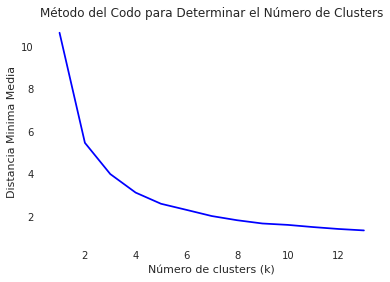

In [350]:
#Método del codo para determinar la cantidad de clusters
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(data_number[['Age','Race', 'Sex', 'Location']])
    distortions.append(sum(np.min(cdist(data_number[['Age','Race', 'Sex', 'Location']], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data_number[['Age','Race', 'Sex', 'Location']].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

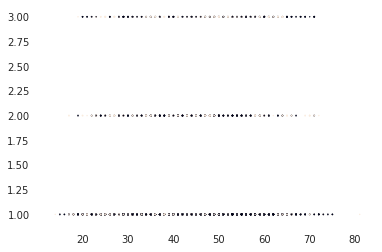

array([0, 1, 1, ..., 0, 0, 1], dtype=int32)

In [351]:
plt.scatter(data_number.Age,data_number.Race, data_number.Sex, data_number.Location)
plt.show()
x=data_number[['Age','Race', 'Sex', 'Location']]
kmeans=KMeans(4)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(data_number)
identified_clusters

#data_number['Cluster'] = identified_clusters
#data_number

**Conclusión:** No presenta una concentración de datos que tengan relación unas con otras directamente, es decir, que el valor de los clusters no es el mismo para todas las filas porque existe una gran variación dentro de los valores que presentan las distintas columnas dentro del dataset por lo cual el no influye la cantidad de clusters, ya que, siempre se agruparan en el máximo establecido. Debido a lo anterior se toma la decisión de no agregar una columna que contenga los clusters a los que pertenecen las columnas.

In [352]:
# Se exporta data_number como un CSV a la ruta de motaje 
drive.mount('/content/drive/', force_remount=True)
data_number.to_csv('/content/drive/My Drive/Colab Notebooks/Proyecto-G1/data_number.csv')

Mounted at /content/drive/


## Análisis Exploratorio de los datos

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [354]:
data_number.head()

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,48.0,2,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30.0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,23.0,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,23.0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [355]:
#Principales estadígrafos para las variables, permitiendo verificar si hay variables fuera de rango
#se verifica que no existen datos erroneos
data_number.describe()

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,42.414863,1.729678,1.272968,1.368446,0.487975,0.271284,0.427850,0.070467,0.128908,0.022607,0.233045,0.026215,0.273208,0.097403,0.031025,0.025012,0.008658,0.005051,0.018038,0.483405
std,12.350422,0.444180,0.603729,0.482441,0.499915,0.444676,0.494826,0.255962,0.335139,0.148665,0.422821,0.159792,0.445660,0.296541,0.173405,0.156180,0.092656,0.070896,0.133103,0.499785
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,81.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


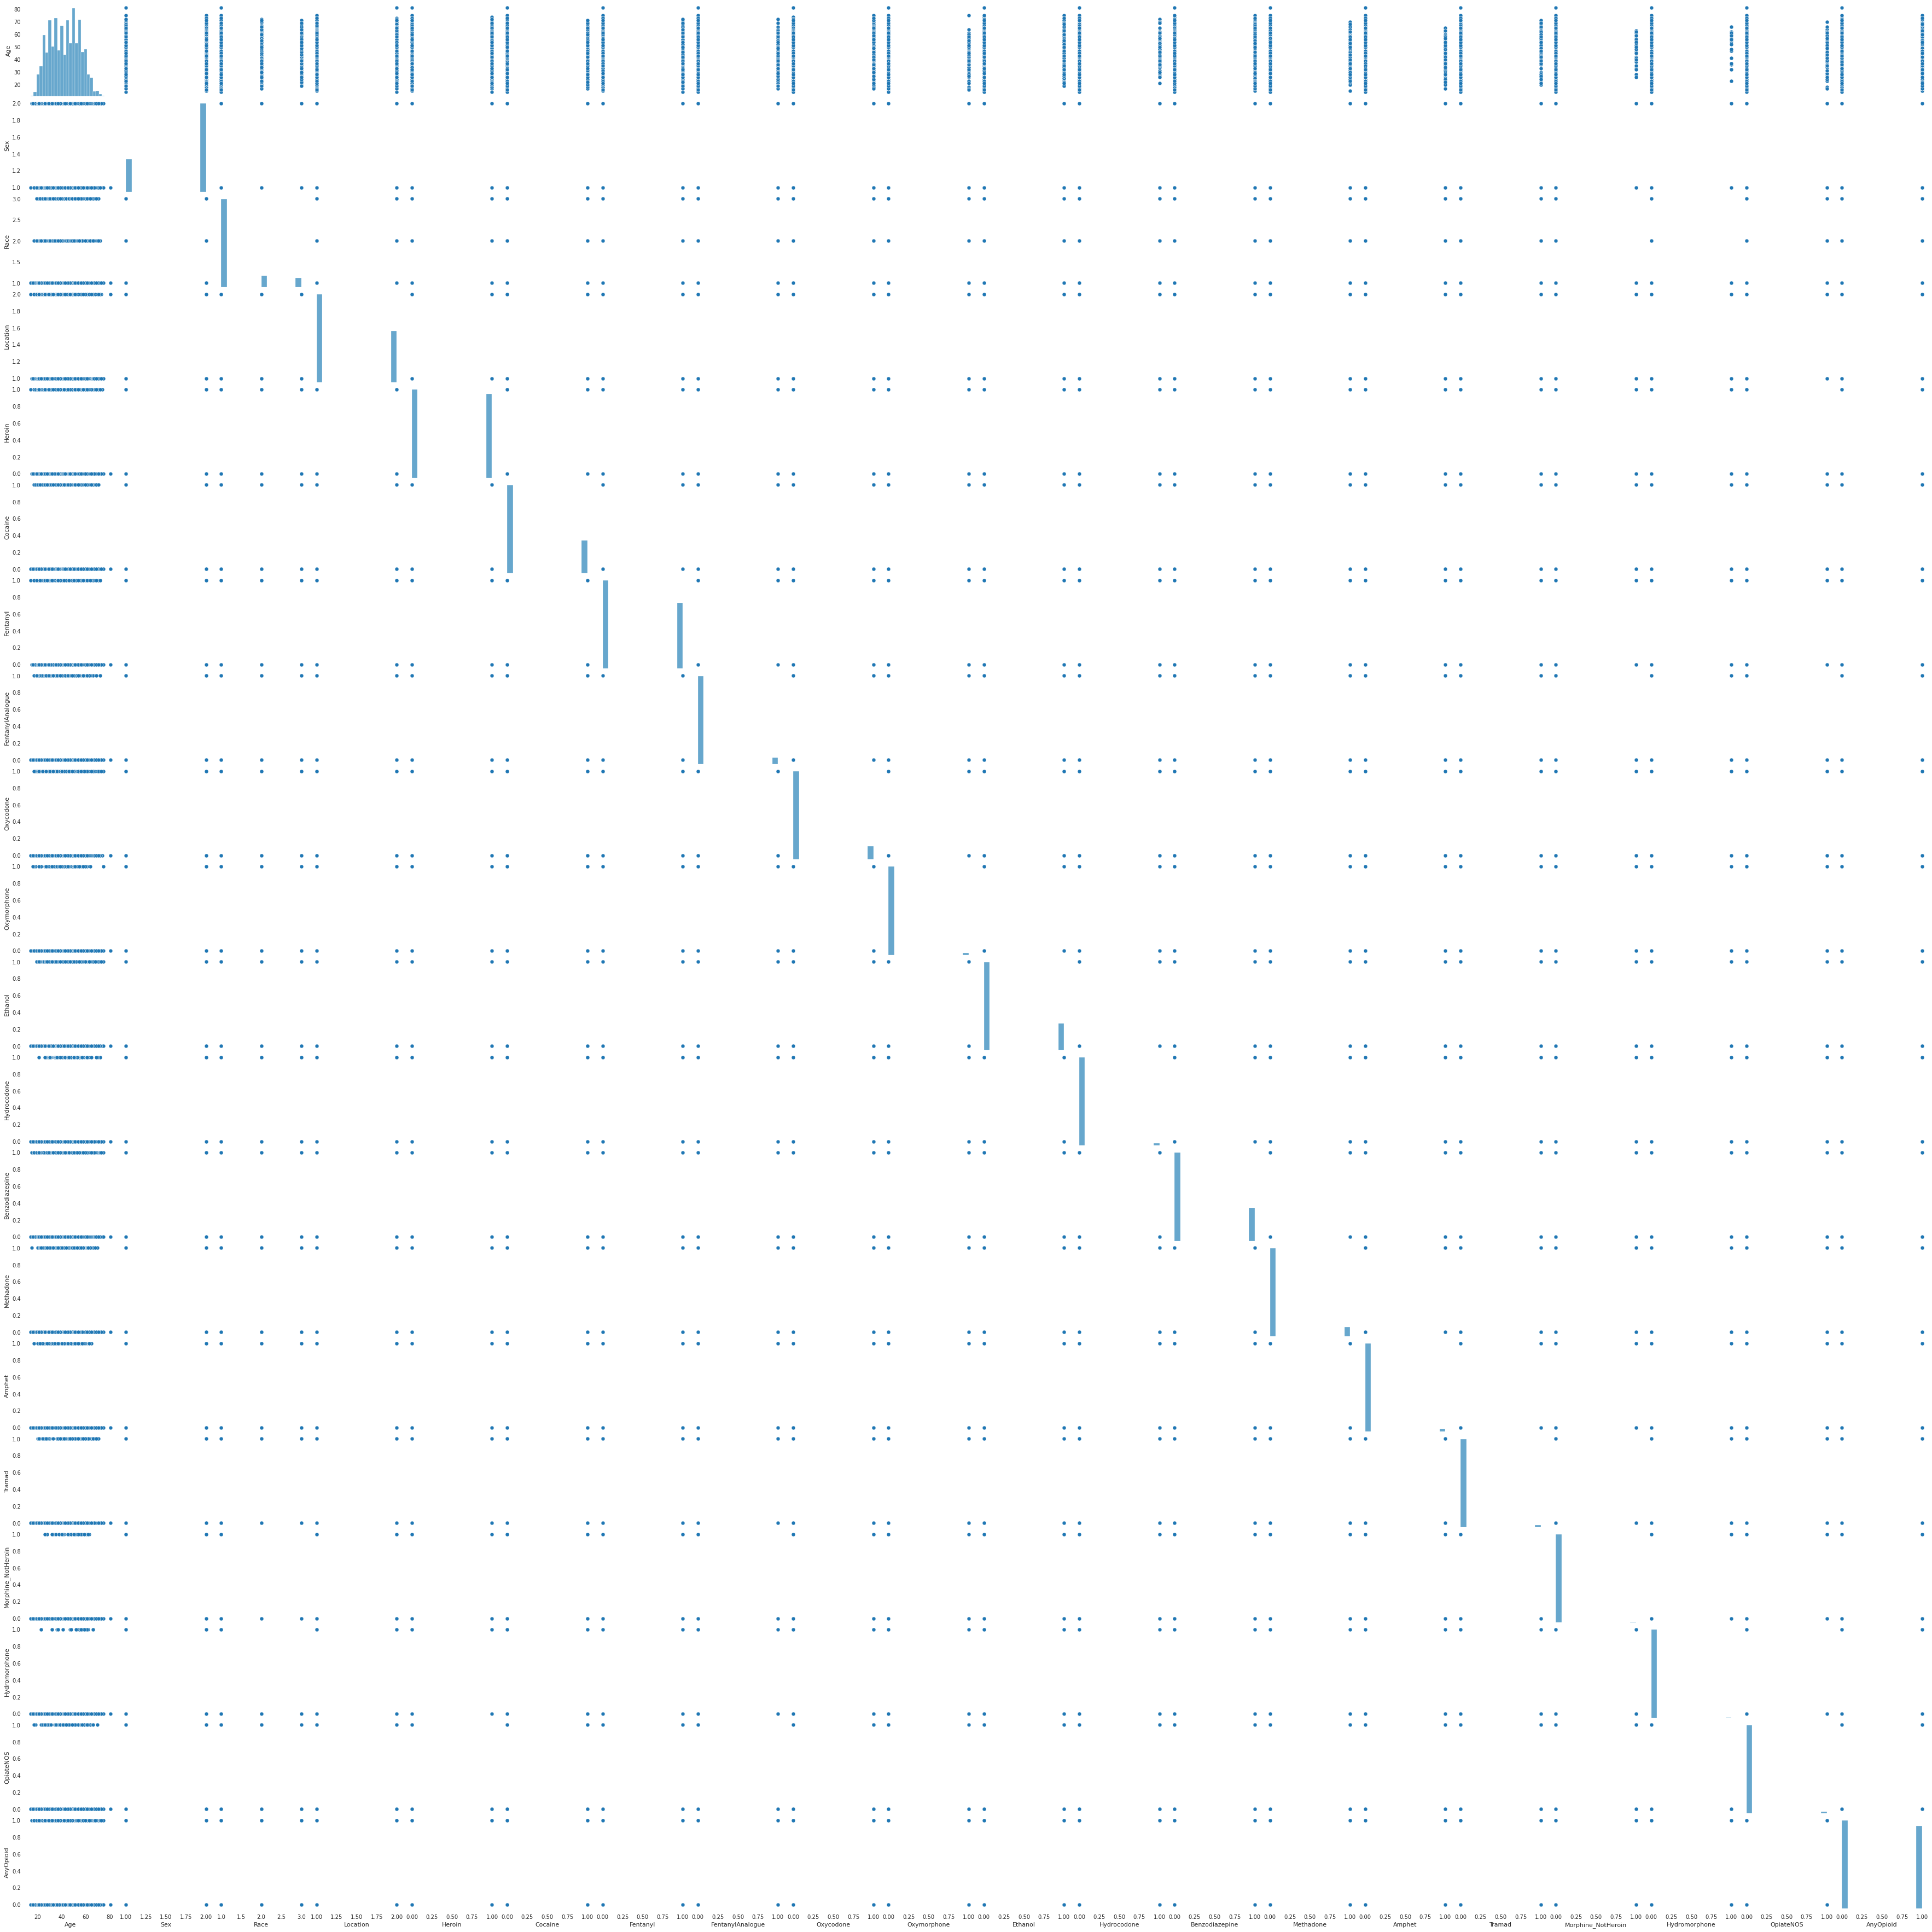

In [356]:
# Evaluar el comportamiento de las distintas variables
#se verifica que no exista una correlacion directa entre las variables
sns.pairplot(data_number)

In [357]:
#Se evalua la correlacion entre las distintas variables para confirmar que no exista correlación entre ellas
data_number.corr()

,Age,Sex,Race,Location,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
Age,1.000000,-0.038619,0.122020,-0.079397,-0.136825,0.046607,-0.109666,-0.009402,0.131559,0.030790,0.082965,0.068112,0.063098,0.064828,-0.039597,0.086907,0.044369,0.038817,0.032616,-0.001359
Sex,-0.038619,1.000000,0.035717,-0.026792,0.112108,0.021829,0.112626,0.042750,-0.069661,-0.024006,0.057565,-0.079766,-0.117772,-0.053912,-0.009771,-0.016945,-0.036639,-0.017747,-0.031435,0.045889
Race,0.122020,0.035717,1.000000,0.122081,-0.036546,0.174813,-0.003712,0.012485,-0.056249,-0.052690,0.003293,-0.031802,-0.138663,-0.039708,-0.041850,-0.006094,-0.042259,-0.032217,-0.022370,-0.011692
Location,-0.079397,-0.026792,0.122081,1.000000,0.010395,0.046414,-0.021631,-0.007704,-0.072140,-0.028959,-0.022435,-0.041067,-0.064395,-0.030638,-0.013025,0.005369,-0.033710,-0.019253,0.053819,-0.029509
Heroin,-0.136825,0.112108,-0.036546,0.010395,1.000000,-0.013457,-0.015664,0.001924,-0.239142,-0.116103,-0.027140,-0.090912,-0.115899,-0.122725,-0.010958,-0.039281,-0.086039,-0.015255,-0.132310,0.058895
Cocaine,0.046607,0.021829,0.174813,0.046414,-0.013457,1.000000,0.012447,0.030675,-0.115266,-0.056405,-0.058694,-0.059483,-0.119176,-0.061789,-0.003106,-0.031914,-0.045343,-0.020579,-0.058308,-0.059837
Fentanyl,-0.109666,0.112626,-0.003712,-0.021631,-0.015664,0.012447,1.000000,0.316497,-0.165842,-0.085735,-0.000674,-0.084078,-0.044766,-0.110297,0.027495,-0.026447,-0.054580,-0.006753,-0.062415,0.282107
FentanylAnalogue,-0.009402,0.042750,0.012485,-0.007704,0.001924,0.030675,0.316497,1.000000,-0.055441,-0.035552,0.008264,-0.021649,0.016765,-0.020724,0.032030,-0.014012,-0.025731,-0.006360,-0.037316,0.085301
Oxycodone,0.131559,-0.069661,-0.056249,-0.072140,-0.239142,-0.115266,-0.165842,-0.055441,1.000000,0.313268,0.008637,0.053675,0.145858,-0.046493,-0.006744,0.002728,0.072505,0.043464,0.039539,-0.034620
Oxymorphone,0.030790,-0.024006,-0.052690,-0.028959,-0.116103,-0.056405,-0.085735,-0.035552,0.313268,1.000000,0.000359,-0.004700,0.070142,-0.011764,-0.008550,-0.003638,0.003251,0.011988,-0.008455,-0.069415


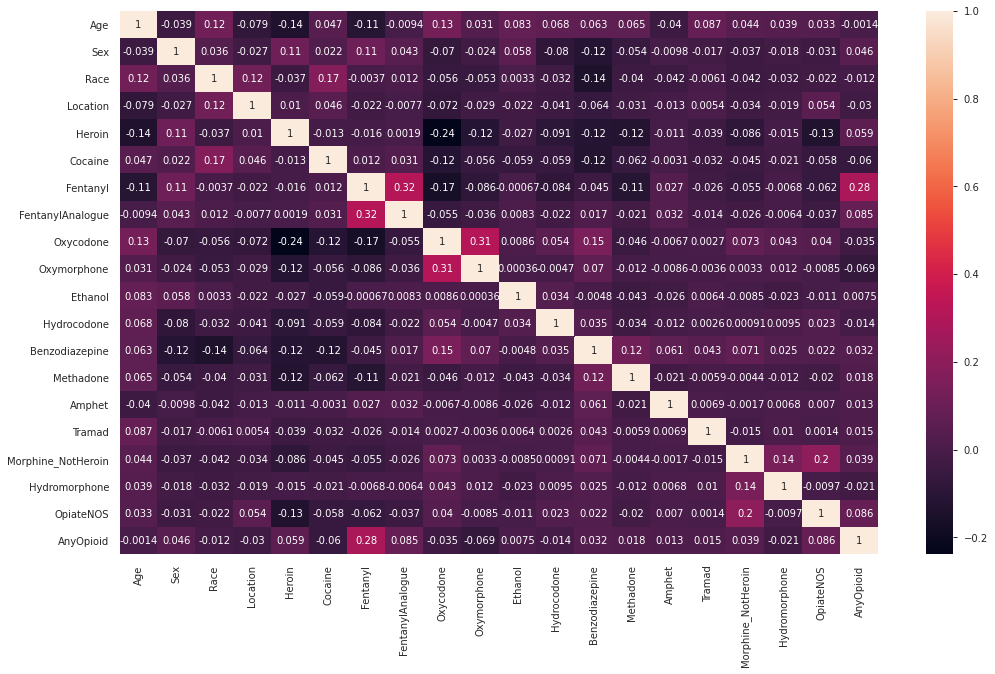

In [358]:
#Se determina el grado de correlacion entre las variables
fig=plt.figure(figsize=(17,10))
sns.heatmap(data_number.corr(), annot=True)
#Se verifica que no existe una correlación directa entre las variables, por tal motivo no se elimina ninguna variable

### Pricipales Drogas candidatas a Target
Se analizan las 3 drogas con mayor presencia en el df con el fin de comprobar que el target inicial planteado sea correcto.

#### Fentanyl

In [359]:
#Determinar la frecuencia de las clases en la variable Fentanyl
data_number.Fentanyl.value_counts()

0    2379
1    1779
Name: Fentanyl, dtype: int64

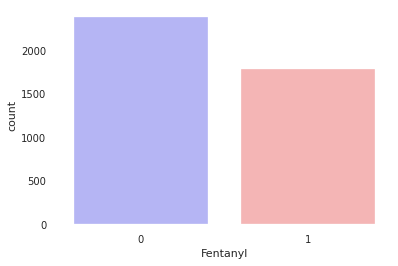

In [360]:
#Determinar la frecuencia de las clases para la clasificación binaria
# si esta desbalanciado, hay que tomar decision de aplicar metodos de balanceo de clases(metodos de muestreo)
sns.countplot(x="Fentanyl", data=data_number, palette="bwr")
plt.show()

In [361]:
#Se determina pocentualmente la cantidad de personas a las que se le encontro Fentanyl con el examen toxicologico y a los que no se les encontro
CountFemale=len(data_number[data_number.Fentanyl==1])
CountMale=len(data_number[data_number.Fentanyl==0])
print("porc. de probabilidad de encontrar Fentanyl en el cuerpo:{:.2f}".format((CountFemale/(len(data_number.Fentanyl))*100)))
print("porc. de probabilidad de NO encontrar Fentanyl en el cuerpo:{:.2f}".format((CountMale/(len(data_number.Fentanyl))*100)))


#Debido a que el porcentaje de diferencia entre las clases de la variable es 15 % 
#se considera de clase balaceada y por este motivo se decide que no es necesario balancear

porc. de probabilidad de encontrar Fentanyl en el cuerpo:42.78
porc. de probabilidad de NO encontrar Fentanyl en el cuerpo:57.22


#### Heroin

In [362]:
#Determinar la frecuencia de las clases en la variable Heroin
data_number.Heroin.value_counts()

0    2129
1    2029
Name: Heroin, dtype: int64

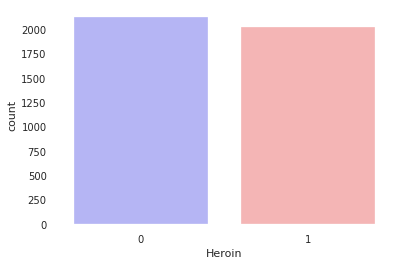

In [363]:
#Determinar la frecuencia de las clases para la clasificación binaria
# si esta desbalanciado, hay que tomar decision de aplicar metodos de balanceo de clases(metodos de muestreo)
sns.countplot(x="Heroin", data=data_number, palette="bwr")
plt.show()

In [364]:
#Se determina pocentualmente la cantidad de personas a las que se le encontro Fentanyl con el examen toxicologico y a los que no se les encontro
CountFemale=len(data_number[data_number.Heroin==1])
CountMale=len(data_number[data_number.Heroin==0])
print("porc. de probabilidad de encontrar Heroin en el cuerpo:{:.2f}".format((CountFemale/(len(data_number.Heroin))*100)))
print("porc. de probabilidad de NO encontrar Heroin en el cuerpo:{:.2f}".format((CountMale/(len(data_number.Heroin))*100)))


#Debido a que el porcentaje de diferencia entre las clases de la variable es 3 % 
#se considera de clase balaceada y por este motivo se decide que no es necesario balancear

porc. de probabilidad de encontrar Heroin en el cuerpo:48.80
porc. de probabilidad de NO encontrar Heroin en el cuerpo:51.20


#### AnyOpioid

In [365]:
#Determinar la frecuencia de las clases en la variable AnyOpioid
data_number.AnyOpioid.value_counts()

0    2148
1    2010
Name: AnyOpioid, dtype: int64

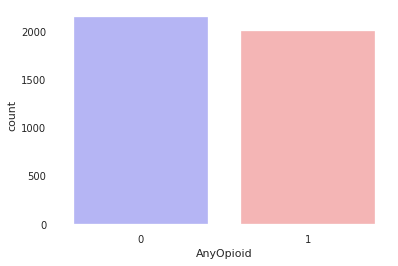

In [366]:
#Determinar la frecuencia de las clases para la clasificación binaria
# si esta desbalanciado, hay que tomar decision de aplicar metodos de balanceo de clases(metodos de muestreo)
sns.countplot(x="AnyOpioid", data=data_number, palette="bwr")
plt.show()

In [367]:
#Se determina pocentualmente la cantidad de personas a las que se le encontro Fentanyl con el examen toxicologico y a los que no se les encontro
CountFemale=len(data_number[data_number.AnyOpioid==1])
CountMale=len(data_number[data_number.AnyOpioid==0])
print("porc. de probabilidad de encontrar AnyOpioid en el cuerpo:{:.2f}".format((CountFemale/(len(data_number.AnyOpioid))*100)))
print("porc. de probabilidad de NO encontrar AnyOpioid en el cuerpo:{:.2f}".format((CountMale/(len(data_number.AnyOpioid))*100)))


#Debido a que el porcentaje de diferencia entre las clases de la variable target es 3.34 % 
#se considera de clase balaceada y por este motivo se decide que no es necesario balancear

porc. de probabilidad de encontrar AnyOpioid en el cuerpo:48.34
porc. de probabilidad de NO encontrar AnyOpioid en el cuerpo:51.66


#### Conclusión
Fentanyl se mantiene como el target debido a que estaba dentro de las más representativas del dataset y a su vez tiene una diferencia de clase aceptable, por lo cual es optima para su utilización como variable objetivo. 

### Fentanyl con respecto a las variables biograficas

In [368]:
#Se verifica el comportamiento de las variables con respecto a la variable target(Fentanyl)
data_number.groupby("Fentanyl").mean()

,Age,Sex,Race,Location,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
Fentanyl,,,,,,,,,,,,,,,,,,,
0,43.585960,1.686423,1.274905,1.37747,0.494746,0.266499,0.000420,0.176965,0.033628,0.233291,0.037831,0.290458,0.125683,0.026902,0.028583,0.013031,0.005464,0.025221,0.361496
1,40.848791,1.787521,1.270377,1.35638,0.478921,0.277684,0.164137,0.064643,0.007870,0.232715,0.010680,0.250141,0.059584,0.036537,0.020236,0.002811,0.004497,0.008432,0.646431


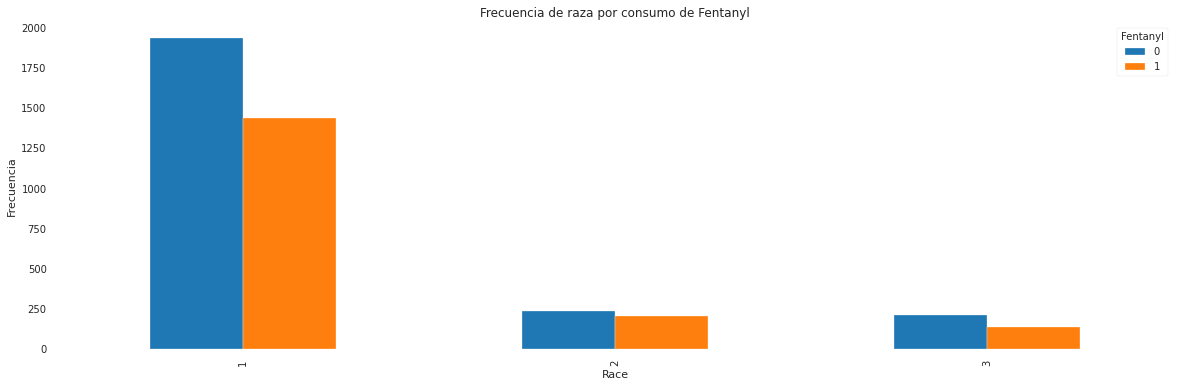

In [369]:
#Se grafica el comportamiento de distintas variables biograficas de las personas que murieron a causada del consumo de Fentanyl
#Se grafica el comportamiento de la raza de acuerdo a la variable Fenantyl
pd.crosstab(data_number.Race,data_number.Fentanyl).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia de raza por consumo de Fentanyl')
plt.xlabel('Race')
plt.ylabel('Frecuencia')
plt.show()

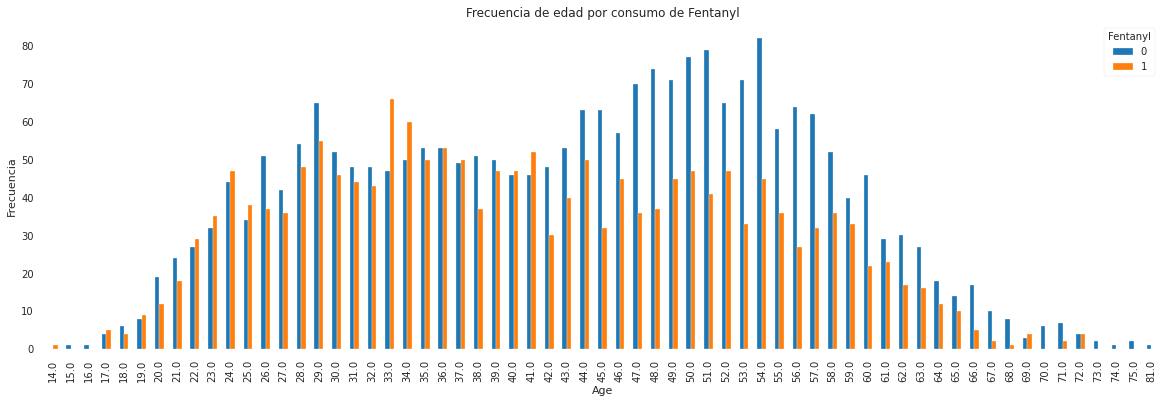

In [370]:
#Se grafica el comportamiento de la edad de acuerdo a la variable Fenantyl
pd.crosstab(data_number.Age,data_number.Fentanyl).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia de edad por consumo de Fentanyl')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

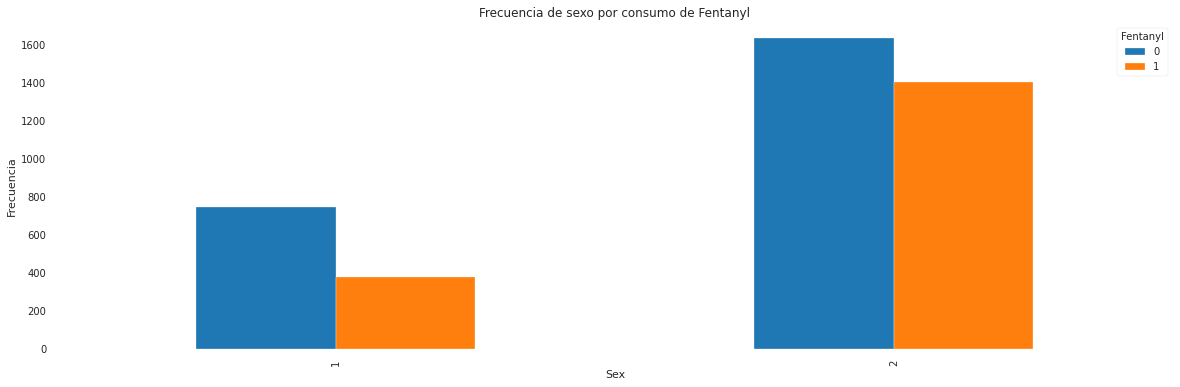

In [371]:
#Se grafica el comportamiento del sexo de acuerdo a la variable Fenantyl
pd.crosstab(data_number.Sex,data_number.Fentanyl).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia de sexo por consumo de Fentanyl')
plt.xlabel('Sex')
plt.ylabel('Frecuencia')
plt.show()

## Análisis PCA

In [ ]:
!pip install mglearn

In [373]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [374]:
entrada_df = data_number.drop(['Fentanyl'], axis=1)
entrada = entrada_df.values
entrada

array([[48.,  2.,  3., ...,  0.,  0.,  0.],
       [30.,  1.,  1., ...,  0.,  0.,  1.],
       [23.,  2.,  1., ...,  0.,  0.,  1.],
       ...,
       [45.,  1.,  1., ...,  0.,  0.,  1.],
       [43.,  2.,  1., ...,  0.,  0.,  0.],
       [21.,  2.,  1., ...,  0.,  0.,  0.]])

In [375]:
target = data_number.Fentanyl.values
target

array([0, 0, 1, ..., 0, 0, 0])

In [376]:
#Entranamiento PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(entrada)
transformada = pca.transform(entrada)
print(entrada.shape)
print(transformada.shape)

(4158, 19)
(4158, 2)


Text(0, 0.5, 'PCA 2')

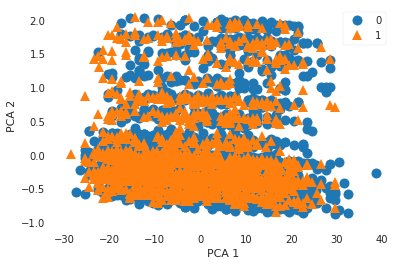

In [377]:
#Gráfico en relación al objetivo (data no escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], target)
plt.legend(['0', '1'], loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

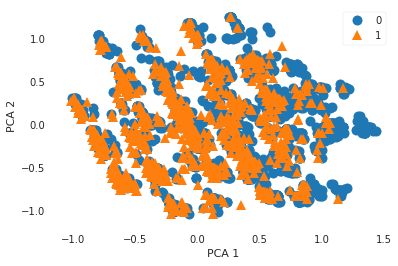

In [378]:
#Escalado de la data
escala = MinMaxScaler()
escala.fit(entrada)
escalada = escala.transform(entrada)
pca.fit(escalada)
transformada2 = pca.transform(escalada)
mglearn.discrete_scatter(transformada2[:,0], transformada2[:,1],target)
plt.legend(['0', '1'], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

**Conclusión:** No existe una clara agrupación de los datos.

## Análisis Factorial

In [ ]:
!pip install factor_analyzer==0.2.3

In [380]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

In [381]:
chi_square_value, p_value = calculate_bartlett_sphericity(entrada_df)
print("Chi cuadrado: ",chi_square_value)
print("Valor P: ", p_value)

kmo_all, kmo_model = calculate_kmo(data_number)
print("Valor KMO: ", kmo_model)

Chi cuadrado:  2680.9441284995805
Valor P:  0.0
Valor KMO:  0.5488651648164744


In [382]:
fa = FactorAnalyzer()
fa.analyze(entrada_df, len(entrada_df.columns), rotation = None)
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.812394
1,1.345152
2,1.255355
3,1.178271
4,1.161167
5,1.081064
6,1.070670
7,1.040674
8,1.014272
9,0.957908


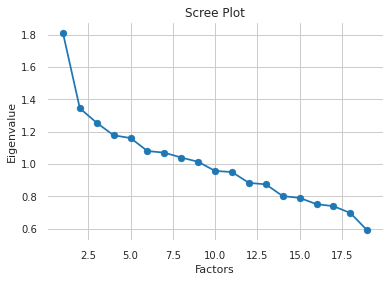

In [383]:
plt.scatter(range(1,entrada_df.shape[1]+1),ev)
plt.plot(range(1,entrada_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Se consideraran los factores más cercanos a 1, o sea, los primeros 10.

In [384]:
fa = FactorAnalyzer()
fa.analyze(entrada_df, 10, rotation="varimax")
Factores = fa.loadings
Factores

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
Age,0.110098,0.101751,0.073126,0.012566,0.214631,0.765878,-0.113525,-0.008565,-0.015604,-0.134377
Sex,-0.035073,-0.045213,-0.024569,0.025345,0.039333,-0.044236,-0.029447,0.056704,0.479057,-0.005903
Race,-0.051194,-0.045680,-0.020795,0.015733,0.360694,0.070064,0.122667,-0.034862,0.060257,-0.137622
Location,-0.046164,-0.034329,-0.014278,-0.013001,0.095614,-0.025015,0.658890,-0.001611,-0.031254,-0.033887
Heroin,-0.201053,-0.049204,-0.081281,0.035391,-0.068393,-0.116354,0.005828,0.956102,0.088624,-0.066461
Cocaine,-0.082084,-0.036730,-0.027304,-0.048053,0.512052,-0.058745,-0.014706,0.001583,-0.016411,0.051361
FentanylAnalogue,-0.054992,-0.026633,-0.008042,0.069117,0.051930,0.012468,-0.015856,-0.003313,0.082129,0.163961
Oxycodone,0.664553,0.083375,-0.038798,0.011434,-0.097559,0.078912,-0.047187,-0.104700,-0.074707,-0.053002
Oxymorphone,0.462555,0.008049,0.003506,-0.047398,-0.044546,-0.022160,-0.009967,-0.026285,0.000299,-0.012800
Ethanol,-0.011318,-0.015909,-0.048664,0.000415,-0.086349,0.128047,-0.022021,-0.042760,0.135524,-0.073022


In [385]:
#Se exporta Factores
drive.mount('/content/drive/', force_remount=True)
Factores.to_excel('/content/drive/My Drive/Colab Notebooks/Proyecto-G1/Factores.xlsx')

Mounted at /content/drive/


**Conclusión:** Luego del análisis factorial para las variables de entrada, se puede observar que no existen grandes simiitudes entre ellas en los factores analizados, debido a esto se toma la decisión de no eliminar ninguna de las columnas ya consideradas.

## Modelos y Entrenamiento

### Normalización
Aquí se normalizará y separá de manera definitiva las variables de entrada (X) y la variable objetivo (Y), además de establecer los grupos de entrenamiento y prueba.

In [386]:
#Definición de datos de entrada
X_data = data_number.drop(['Fentanyl'], axis=1)
X_data.shape

(4158, 19)

In [387]:
#Normalizacion mediante el método Min-Max a la variable X_data y se define como variable "X"
X=(X_data-np.min(X_data))/(np.max(X_data)-np.min(X_data)).values
X.head()

,Age,Sex,Race,Location,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,0.507463,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.238806,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.134328,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.134328,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.104478,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
#Definición del Target
Y = data_number.Fentanyl.values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [389]:
#Separación de datos entre datos de entrneamiento y datos de prueba
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

### Regresión Logística

In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

In [391]:
#Se define el algoritmo
lr=LogisticRegression(solver='newton-cg') 
#Se entrena el modelo con los datos de entrenamiento
lr.fit(X_train, Y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
#Calculo de la precisión del modelo
precision_lr = precision_score(Y_test, lr.predict(X_test))
print('Precisión del Modelo: ', precision_lr)
print("Exactitud del Modelo: ", accuracy_score(Y_test, lr.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, lr.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, lr.predict(X_test)))
print("Matriz de confusion: \n", confusion_matrix(Y_test, lr.predict(X_test)))

Precisión del Modelo:  0.7533333333333333
Exactitud del Modelo:  0.734375
Sensibilidad del Modelo:  0.6058981233243967
Puntaje F1 del Modelo:  0.6716196136701337
Matriz de confusion: 
 [[385  74]
 [147 226]]


### Árbol de decisión - 3, 4 y 5 Niveles

#### 3 Niveles

In [393]:
#Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Se define el algoritmo 
clf_tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3) 

#Se entrena el modelo con los datos de entrenamiento
clf_tree3.fit(X_train, Y_train)

#Metricas del Modelo
precision_tree = precision_score(Y_test, clf_tree3.predict(X_test))
print('Precisión del Modelo: ', precision_tree)
print("Exactitud del Modelo: ", accuracy_score(Y_test, clf_tree3.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, clf_tree3.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, clf_tree3.predict(X_test)))
print("Matriz de confusion:\n", confusion_matrix(Y_test, clf_tree3.predict(X_test)))

Precisión del Modelo:  0.6432160804020101
Exactitud del Modelo:  0.6887019230769231
Sensibilidad del Modelo:  0.6863270777479893
Puntaje F1 del Modelo:  0.6640726329442282
Matriz de confusion:
 [[317 142]
 [117 256]]


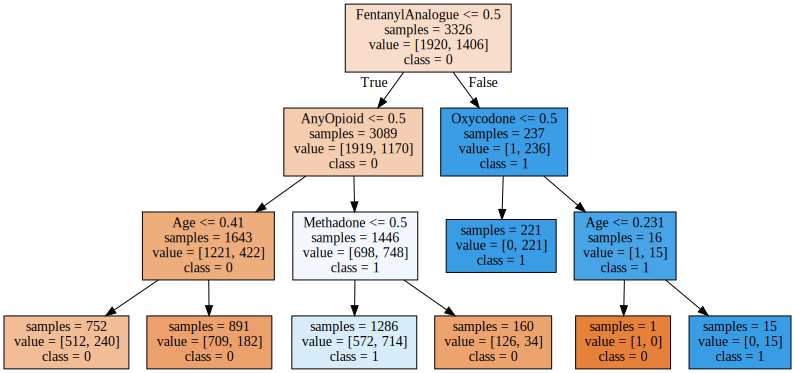

In [394]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph
export_graphviz(clf_tree3, out_file="tree3.dot", max_depth=3,class_names=['0', '1'], 
                feature_names=X.columns,  impurity=False,filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 4 Niveles

In [395]:
#Se define el algoritmo
clf_tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4) 

#Se entrena el modelo con los datos de entrenamiento
clf_tree4.fit(X_train, Y_train)

#Metricas del modelo
precision_tree2 = precision_score(Y_test, clf_tree4.predict(X_test))
print('Precisión del Modelo: ', precision_tree2)
print("Exactitud del Modelo: ", accuracy_score(Y_test, clf_tree4.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, clf_tree4.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, clf_tree4.predict(X_test)))
print("Matriz de confusion:\n", confusion_matrix(Y_test, clf_tree4.predict(X_test)))

Precisión del Modelo:  0.6845070422535211
Exactitud del Modelo:  0.7091346153846154
Sensibilidad del Modelo:  0.6514745308310992
Puntaje F1 del Modelo:  0.6675824175824175
Matriz de confusion:
 [[347 112]
 [130 243]]


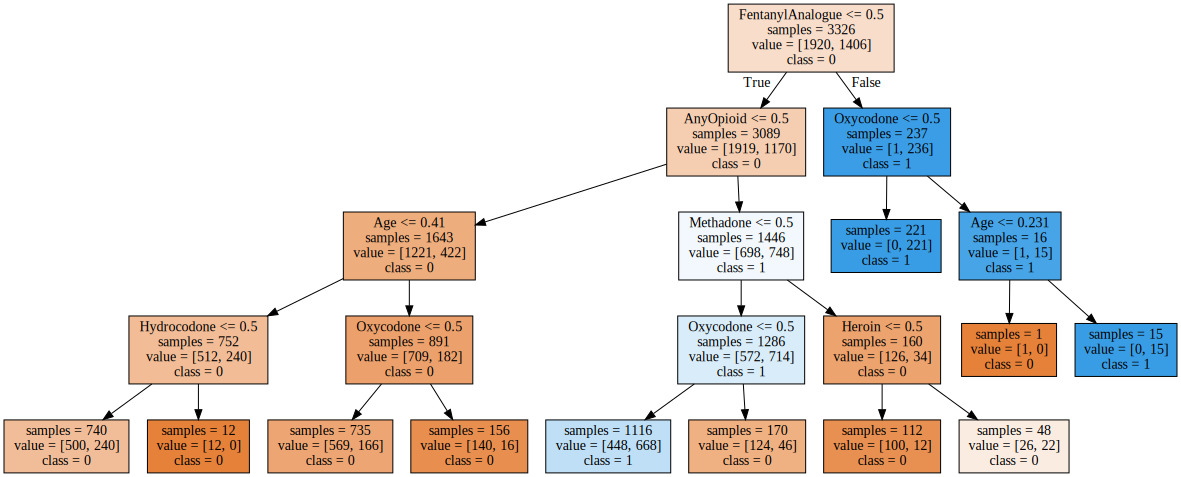

In [396]:
export_graphviz(clf_tree4, out_file="tree4.dot", max_depth=4,class_names=['0', '1'], 
                feature_names=X.columns,  impurity=False,filled=True)

with open("tree4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 5 Niveles

In [397]:
#Se define el algoritmo
clf_tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5) 

#Se entrena el modelo con los datos de entrenamiento
clf_tree5.fit(X_train, Y_train)

#Metricas del Modelo
precision_tree3 = precision_score(Y_test, clf_tree5.predict(X_test))
print('Precisión del Modelo: ', precision_tree3)
print("Exactitud del Modelo: ", accuracy_score(Y_test, clf_tree5.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, clf_tree5.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, clf_tree5.predict(X_test)))
print("Matriz de confusion:\n", confusion_matrix(Y_test, clf_tree5.predict(X_test)))

Precisión del Modelo:  0.8810810810810811
Exactitud del Modelo:  0.7211538461538461
Sensibilidad del Modelo:  0.43699731903485256
Puntaje F1 del Modelo:  0.5842293906810037
Matriz de confusion:
 [[437  22]
 [210 163]]


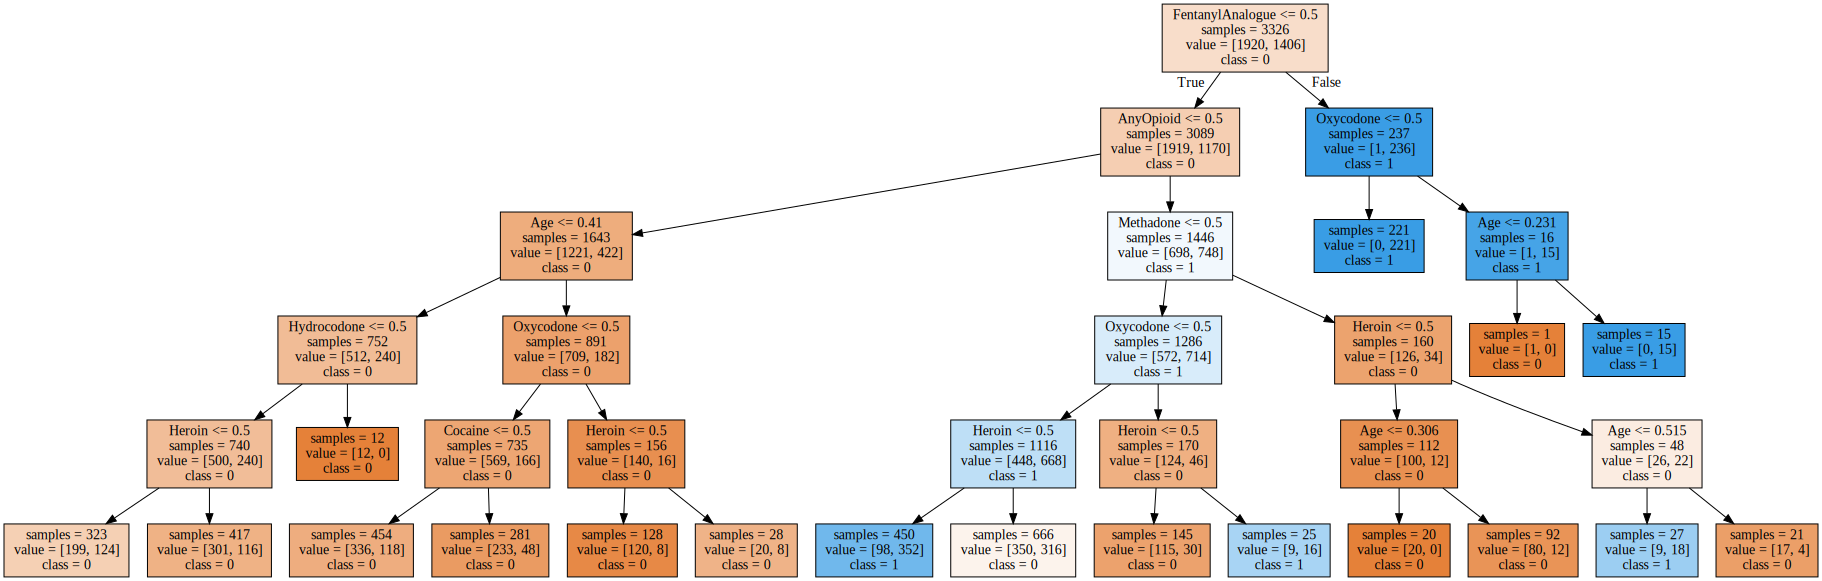

In [398]:
export_graphviz(clf_tree5, out_file="tree5.dot", max_depth=5,class_names=['0', '1'], 
                feature_names=X.columns,  impurity=False,filled=True)

with open("tree5.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Random Forest

In [399]:
#Se importa la libreria
from sklearn.ensemble import RandomForestClassifier

#Se define el algoritmo
rf = RandomForestClassifier(n_estimators=1000, random_state = 1)

#Se entrena el modelo con los datos de entrenamiento
rf.fit(X_train, Y_train)

#Metricas del Modelo
precision_rf = precision_score(Y_test, rf.predict(X_test))
print('Precisión del Modelo: ', precision_rf)
print("Exactitud del Modelo: ", accuracy_score(Y_test, rf.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, rf.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, rf.predict(X_test)))
print("Matriz de confusion:\n", confusion_matrix(Y_test, rf.predict(X_test)))

Precisión del Modelo:  0.7269938650306749
Exactitud del Modelo:  0.7295673076923077
Sensibilidad del Modelo:  0.6353887399463807
Puntaje F1 del Modelo:  0.6781115879828327
Matriz de confusion:
 [[370  89]
 [136 237]]


### Adaboost

In [400]:
#Se importa la libreria
from sklearn.ensemble import AdaBoostClassifier

#Se define el algoritmo
ada = AdaBoostClassifier(base_estimator=clf_tree3, n_estimators=500, learning_rate=1.5)

#Se entrena el modelo con los datos de entrenamiento
ada = ada.fit(X_train, Y_train)

#Metricas del Modelo
precision_ada = precision_score(Y_test, ada.predict(X_test))
print('Precisión del Modelo: ', precision_ada)
print("Exactitud del Modelo: ", accuracy_score(Y_test, ada.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, ada.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, ada.predict(X_test)))
print("Matriz de confusion:\n", confusion_matrix(Y_test, ada.predict(X_test)))

Precisión del Modelo:  0.6737804878048781
Exactitud del Modelo:  0.6887019230769231
Sensibilidad del Modelo:  0.5924932975871313
Puntaje F1 del Modelo:  0.630527817403709
Matriz de confusion:
 [[352 107]
 [152 221]]


### Clasificador Bayessiano

In [401]:
# Se importa la librería 
from sklearn.naive_bayes import GaussianNB

clf_bayes = GaussianNB() #Definición del algoritmo
clf_bayes.fit(X_train, Y_train) #Entrenamiento del algoritmo

Y_predict = clf_bayes.predict(X_test) #Predicción del target en base a los datos de prueba

#Calculo de la precisión del modelo
precision_bayes = precision_score(Y_test, Y_predict)
print('Precisión del Modelo: ', precision_bayes)
print("Exactitud del Modelo: ", accuracy_score(Y_test, clf_bayes.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, clf_bayes.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, clf_bayes.predict(X_test)))
print("Matriz de confusion:\n", confusion_matrix(Y_test, clf_bayes.predict(X_test)))

Precisión del Modelo:  0.6206896551724138
Exactitud del Modelo:  0.6778846153846154
Sensibilidad del Modelo:  0.7238605898123325
Puntaje F1 del Modelo:  0.6683168316831685
Matriz de confusion:
 [[294 165]
 [103 270]]


### Máquinas Generadoras de Vectores

In [402]:
#Importación SVM
from sklearn import svm

#### Kernel Lineal

In [403]:
# Kernel Lineal
SVM_1 = svm.SVC(kernel='linear')
SVM_1.fit(X_train, Y_train)

#Metricas del Modelo
precision_SVM1 = precision_score(Y_test,SVM_1.predict(X_test))
print('Precisión para SVM 1: Kernel Lineal: ', precision_SVM1)
matriz_SVM_1 = metrics.confusion_matrix(Y_test, SVM_1.predict(X_test))
print("Exactitud del Modelo: ", accuracy_score(Y_test, SVM_1.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, SVM_1.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, SVM_1.predict(X_test)))
print('Matriz de Confusión: ')
print(matriz_SVM_1)

Precisión para SVM 1: Kernel Lineal:  0.7105263157894737
Exactitud del Modelo:  0.7247596153846154
Sensibilidad del Modelo:  0.6514745308310992
Puntaje F1 del Modelo:  0.6797202797202797
Matriz de Confusión: 
[[360  99]
 [130 243]]


#### Kernel Gaussiano

In [404]:
# Kernel RBF
SVM_2 = svm.SVC(kernel='rbf')
SVM_2.fit(X_train, Y_train)

#Métricas del Modelo
precision_SVM2 = precision_score(Y_test,SVM_2.predict(X_test))
print('Precisión para SVM 2: Kernel Gaussiano: ', precision_SVM2)
matriz_SVM_2 = metrics.confusion_matrix(Y_test, SVM_2.predict(X_test))
print("Exactitud del Modelo: ", accuracy_score(Y_test, SVM_2.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, SVM_2.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, SVM_2.predict(X_test)))
print('Matriz de Confusión SVM 2: Kernel Gaussiano: ')
print(matriz_SVM_2)

Precisión para SVM 2: Kernel Gaussiano:  0.8375
Exactitud del Modelo:  0.7463942307692307
Sensibilidad del Modelo:  0.5388739946380697
Puntaje F1 del Modelo:  0.6557911908646004
Matriz de Confusión SVM 2: Kernel Gaussiano: 
[[420  39]
 [172 201]]


#### Kernel Sigmoidal

In [405]:
# Kernel Sigmoid
SVM_3 = svm.SVC(kernel='sigmoid')
SVM_3.fit(X_train, Y_train)

#Metricas del Modelo
precision_SVM3 = precision_score(Y_test,SVM_3.predict(X_test))
print('Precisión para SVM 3: Kernel Sigmoidal: ', precision_SVM3)
matriz_SVM_3 = metrics.confusion_matrix(Y_test, SVM_3.predict(X_test))
print("Exactitud del Modelo: ", accuracy_score(Y_test, SVM_3.predict(X_test)))
print("Sensibilidad del Modelo: ", recall_score(Y_test, SVM_3.predict(X_test)))
print("Puntaje F1 del Modelo: ", f1_score(Y_test, SVM_3.predict(X_test)))
print('Matriz de Confusión SVM 3: Kernel Sigmoidal: ')
print(matriz_SVM_3)

Precisión para SVM 3: Kernel Sigmoidal:  0.49848024316109424
Exactitud del Modelo:  0.5504807692307693
Sensibilidad del Modelo:  0.43967828418230565
Puntaje F1 del Modelo:  0.4672364672364673
Matriz de Confusión SVM 3: Kernel Sigmoidal: 
[[294 165]
 [209 164]]


### Redes Neuronales

In [406]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import cross_val_score

In [407]:
nom_col=['Age','Sex','Race','Location','Heroin','Cocaine','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone	Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','OpiateNOS','AnyOpioid']
target_col=['Fentanyl']

In [408]:
lista=[]

opti = ['Adam','Adadelta']            #//'SGD', 'RMSprop', , 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl' metodos opcionales
acti = ['tanh','relu','sigmoid']      #//'sigmoid', 'softmax', 'softplus', 'softsign', , 'selu', 'elu', 'exponential', metodos opcionales
for op in opti:
    for ac in acti:
        ES = EarlyStopping(monitor='loss', patience=20)
        sublista=[]
        print("\n===>Optimizador: ", op)
        print("\n===>Activadores: ", ac)

        MLP=Sequential()
        MLP.add(Dense(25, input_dim=len(nom_col)+1, activation=ac))
        MLP.add(Dense(25, activation=ac))
        MLP.add(Dropout(0.3))
        MLP.add(Dense(10, activation=ac))
        MLP.add(Dropout(0.3))
        MLP.add(Dense(5, activation=ac))
        MLP.add(Dense(1, activation='softmax'))

        MLP.summary()

        # Compilacion del modelo
        MLP.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

        # Ajuste del modelo
        MLP.fit(X_train.values, Y_train, epochs=200, batch_size=10, callbacks=[ES])
        
        

        prediction = MLP.evaluate(X_test, Y_test, verbose=0)
        print('Loss (Test): ',prediction[0])
        print('Acc  (Test):', prediction[1])
        sublista.append(prediction[0])
        sublista.append(prediction[1])
        sublista.append(op)
        sublista.append(ac)
        lista.append(sublista)
        
        cm_train=confusion_matrix(Y_train, MLP.predict_classes(X_train))
        print("\nMatriz de confusion (Train):\n", cm_train)


===>Optimizador:  Adam

===>Activadores:  tanh
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 25)                500       
_________________________________________________________________
dense_96 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_38 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 10)                260       
_________________________________________________________________
dropout_39 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Matriz de confusion (Train):
 [[   0 1920]
 [   0 1406]]

===>Optimizador:  Adam

===>Activadores:  relu
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 25)                500       
_________________________________________________________________
dense_101 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_40 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 10)                260       
_________________________________________________________________
dropout_41 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 5)                 55        
_____________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 25)                500       
_________________________________________________________________
dense_106 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_42 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 10)                260       
_________________________________________________________________
dropout_43 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_108 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_109 (Dense)            (None, 1)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 25)                500       
_________________________________________________________________
dense_111 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_44 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 10)                260       
_________________________________________________________________
dropout_45 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_114 (Dense)            (None, 1)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 25)                500       
_________________________________________________________________
dense_116 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_46 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                260       
_________________________________________________________________
dropout_47 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_119 (Dense)            (None, 1)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 25)                500       
_________________________________________________________________
dense_121 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_48 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 10)                260       
_________________________________________________________________
dropout_49 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_124 (Dense)            (None, 1)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [409]:
lista

[[0.46305596828460693, 0.4483173191547394, 'Adam', 'tanh'],
 [0.7520789504051208, 0.4483173191547394, 'Adam', 'relu'],
 [0.4779556393623352, 0.4483173191547394, 'Adam', 'sigmoid'],
 [0.6731627583503723, 0.4483173191547394, 'Adadelta', 'tanh'],
 [0.6886001229286194, 0.4483173191547394, 'Adadelta', 'relu'],
 [0.688152551651001, 0.4483173191547394, 'Adadelta', 'sigmoid']]

## Validación

In [410]:
from sklearn.model_selection import cross_val_score

In [411]:
#Vallidación Cruzada Regresión Logística
CV_lr =cross_val_score(lr, X,Y, cv=20)
print("Regresión logística: %0.3f (+/- %0.3f)" % (CV_lr.mean(), CV_lr.std() * 2))

Regresión logística: 0.727 (+/- 0.057)


In [412]:
#Validación Árbol de Decisión 3 Niveles
CV_tree3 =cross_val_score(clf_tree3, X,Y, cv=20)
print("Árbol de Decisión 3 Niveles: %0.3f (+/- %0.3f)" % (CV_tree3.mean(), CV_tree3.std() * 2))

Árbol de Decisión 3 Niveles: 0.684 (+/- 0.055)


In [413]:
#Validación Árbol de Decisión 4 Niveles
CV_tree4 =cross_val_score(clf_tree4, X,Y, cv=20)
print("Árbol de Decisión 4 Niveles: %0.3f (+/- %0.3f)" % (CV_tree4.mean(), CV_tree4.std() * 2))

Árbol de Decisión 4 Niveles: 0.715 (+/- 0.057)


In [414]:
#Validación Árbol de Decisión 5 Niveles
CV_tree5 =cross_val_score(clf_tree5, X,Y, cv=20)
print("Árbol de Decisión 5 Niveles: %0.3f (+/- %0.3f)" % (CV_tree5.mean(), CV_tree5.std() * 2))

Árbol de Decisión 5 Niveles: 0.724 (+/- 0.053)


In [415]:
#Vallidación Cruzada Random Forest
CV_rf =cross_val_score(rf, X,Y, cv=20)
print("Random Forest: %0.3f (+/- %0.3f)" % (CV_rf.mean(), CV_rf.std() * 2))

Random Forest: 0.704 (+/- 0.074)


In [416]:
#Vallidación Cruzada Adaboost
CV_ada =cross_val_score(ada, X,Y, cv=20)
print("Adaboost: %0.3f (+/- %0.3f)" % (CV_ada.mean(), CV_ada.std() * 2))

Adaboost: 0.693 (+/- 0.060)


In [417]:
#Validación Cruzada Clasificador Bayessiano
CV_bayes =cross_val_score(clf_bayes, X,Y, cv=20)
print("Clasificador Bayessiano: %0.3f (+/- %0.3f)" % (CV_bayes.mean(), CV_bayes.std() * 2))

Clasificador Bayessiano: 0.663 (+/- 0.061)


In [418]:
#Validación Cruzada SVM Kernel Lineal
CV_kl =cross_val_score(SVM_1, X,Y, cv=20)
print("SVM Kernel Lineal: %0.3f (+/- %0.3f)" % (CV_kl.mean(), CV_kl.std() * 2))

SVM Kernel Lineal: 0.723 (+/- 0.055)


In [419]:
#Validación Cruzada SVM Kernel Gaussiano
CV_kl2 =cross_val_score(SVM_2, X,Y, cv=20)
print("SVM Kernel Gaussiano: %0.3f (+/- %0.3f)" % (CV_kl2.mean(), CV_kl2.std() * 2))

SVM Kernel Gaussiano: 0.741 (+/- 0.064)


In [420]:
#Validación Cruzada SVM Kernel Sigmoidal
CV_kl3 =cross_val_score(SVM_3, X,Y, cv=20)
print("SVM Kernel Sigmoidal: %0.3f (+/- %0.3f)" % (CV_kl3.mean(), CV_kl3.std() * 2))

SVM Kernel Sigmoidal: 0.559 (+/- 0.054)
